## Attempt to understand which events cause the central and the lateral increase in TRK_PHI2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table

In [2]:
f = Table.read('data/xpol_2735_recon.fits', format='fits')
df = f.to_pandas()
df

,PAKTNUMB,bufferID,eventID,TIME,ROI_SIZE,MIN_COL,MAX_COL,MIN_ROW,MAX_ROW,NUM_CLU,...,TRK_PHA,TRK_PI,TRK_PHI2,TRK_ABSX,TRK_ABSY,TRK_BARX,TRK_BARY,TRK_M2T,TRK_M2L,TRK_SKEW
0,0,0,0,6.245021e+08,2688,132,163,102,185,9,...,2814,2814.0,107.985937,0.193092,0.085893,0.149991,0.198358,0.002615,0.007625,0.500242
1,0,0,1,4.940179e+08,624,144,167,166,191,2,...,6395,6395.0,-8.591439,0.225867,-0.117614,0.348724,-0.135205,0.003018,0.009098,-0.618144
2,0,0,2,1.811312e+09,660,138,159,154,183,5,...,6657,6657.0,91.709974,-0.058170,0.180905,-0.066729,0.322421,0.005181,0.012713,0.308013
3,0,0,3,2.064678e+09,704,140,161,162,193,2,...,6412,6412.0,-90.084973,0.024928,0.117566,0.017514,-0.111329,0.004750,0.019706,0.820827
4,0,1,4,5.670261e+08,784,134,161,160,187,6,...,6333,6333.0,-154.815722,0.067194,0.115137,-0.160672,0.072027,0.005423,0.022497,0.504567
5,0,1,5,3.107633e+09,672,138,161,158,185,2,...,6743,6743.0,-178.483303,0.111146,0.180084,-0.013976,0.176029,0.007012,0.012342,0.165453
6,0,1,6,1.480153e+09,660,140,161,164,193,3,...,6731,6731.0,-79.686417,0.021954,0.042447,0.045173,-0.160138,0.003736,0.018666,-0.451405
7,0,1,7,3.718504e+09,2352,132,159,102,185,11,...,4612,4612.0,-49.960774,-0.061739,0.205981,-0.013449,0.146133,0.003741,0.007220,-0.584156
8,0,2,8,3.141516e+09,660,140,161,164,193,3,...,7728,7728.0,-89.387435,0.084151,0.010052,0.076074,-0.176203,0.004829,0.015589,0.573518
9,0,2,9,7.757615e+08,660,138,159,162,191,5,...,6002,6002.0,-78.189248,-0.089569,0.080699,-0.066769,-0.045666,0.005288,0.010997,-0.208064


In [3]:
#print some statistical values
df.describe()

,PAKTNUMB,bufferID,eventID,TIME,ROI_SIZE,MIN_COL,MAX_COL,MIN_ROW,MAX_ROW,NUM_CLU,...,TRK_PHA,TRK_PI,TRK_PHI2,TRK_ABSX,TRK_ABSY,TRK_BARX,TRK_BARY,TRK_M2T,TRK_M2L,TRK_SKEW
count,80933.0,80933.000000,80933.000000,8.093300e+04,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,...,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000,80933.000000
mean,0.0,5841.061310,1464.091755,2.156378e+09,658.351081,138.927113,160.888624,161.235961,188.836803,2.702285,...,5544.722351,7285.698220,-0.837299,0.018563,0.018500,0.020089,0.018983,0.007790,0.015886,-0.000901
std,0.0,3369.008601,17398.715382,1.237221e+09,127.996705,8.634479,8.601848,10.408644,10.086869,1.416621,...,3493.927965,14207.365009,100.606819,0.426358,0.430392,0.430989,0.437752,0.014880,0.024945,0.425237
min,0.0,0.000000,-32768.000000,1.220033e+03,416.000000,0.000000,15.000000,0.000000,13.000000,1.000000,...,-32739.000000,134.000000,-179.994648,-7.478526,-7.506756,-7.419527,-7.502293,0.001296,0.001721,-3.296704
25%,0.0,2923.000000,-12535.000000,1.084574e+09,616.000000,136.000000,159.000000,158.000000,187.000000,2.000000,...,5565.000000,5595.000000,-90.194326,-0.068786,-0.068390,-0.082089,-0.101031,0.003978,0.008494,-0.292916
50%,0.0,5845.000000,3849.000000,2.159973e+09,660.000000,138.000000,161.000000,162.000000,189.000000,3.000000,...,5948.000000,5967.000000,-2.947768,0.016482,0.019665,0.015536,0.018577,0.005487,0.011902,-0.003232
75%,0.0,8759.000000,13965.000000,3.223440e+09,704.000000,142.000000,163.000000,164.000000,191.000000,3.000000,...,6291.000000,6314.000000,89.201098,0.102207,0.106915,0.118127,0.139553,0.006936,0.016757,0.293486
max,0.0,11669.000000,32767.000000,4.294839e+09,4032.000000,286.000000,299.000000,336.000000,351.000000,42.000000,...,32767.000000,850596.000000,179.988179,7.455120,7.585786,7.401599,7.538562,0.326721,1.377848,2.997408


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e579860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e6e04a8>]], dtype=object)

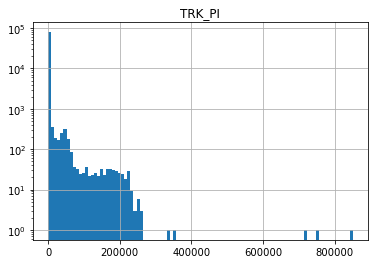

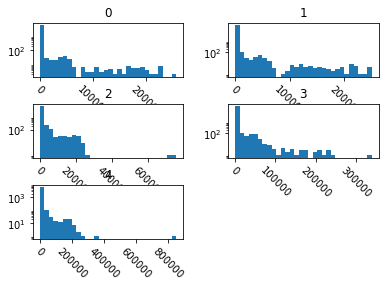

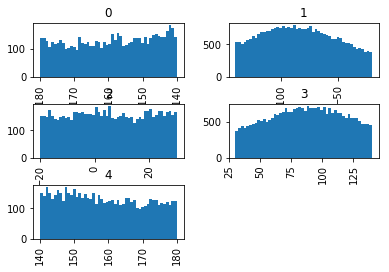

In [4]:
#TEST BIN SU PHI2
phibins = [-180., -140., -20., 30., 140., 180.]
df['phibin'] = pd.cut(df.TRK_PHI2, phibins, labels=False)
df.hist('TRK_PI', bins=100, log=True)
df.hist('TRK_PI', by='phibin', bins=30, xrot=-45., log=True)
df.hist('TRK_PHI2', by='phibin', bins=50)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x112fa6b00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112ec7a20>], dtype=object)

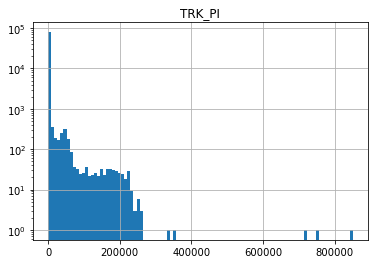

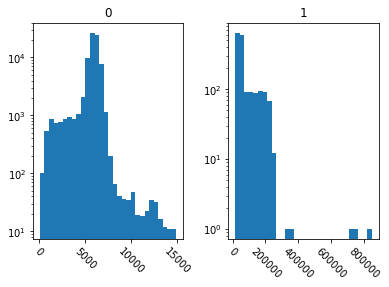

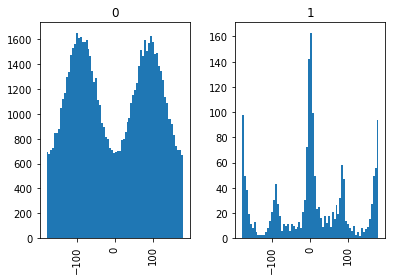

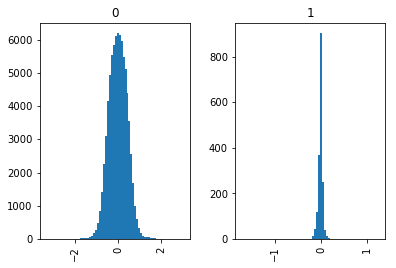

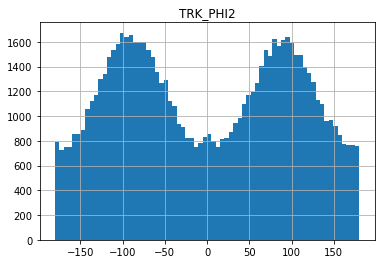

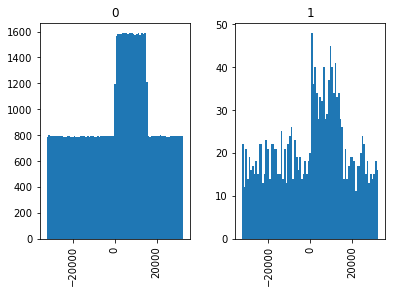

In [5]:
#TEST BIN IN PULSE INVARIANT
pibins = [0, 15000, 900000]
df['pibin'] = pd.cut(df.TRK_PI, pibins, labels=False)
df.hist('TRK_PI', bins=100, log=True)
df.hist('TRK_PI', by='pibin', bins=30, xrot=-45., log=True)
df.hist('TRK_PHI2', grid=True, by='pibin', bins=70)
df.hist('TRK_SKEW', grid=True, by='pibin', bins=70)
df.hist('TRK_PHI2', bins=70)
df.hist('eventID', by='pibin', bins=81)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112ffb3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113544eb8>]], dtype=object)

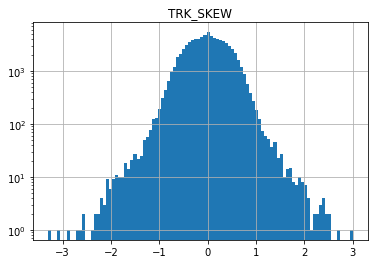

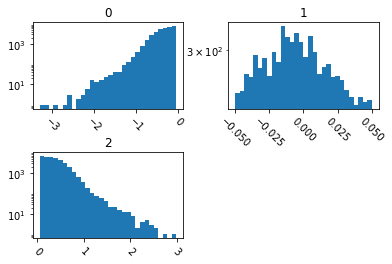

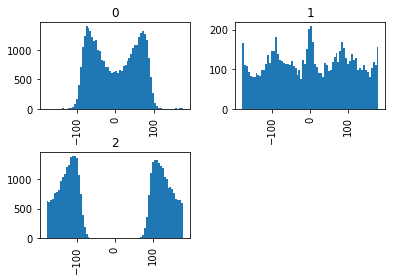

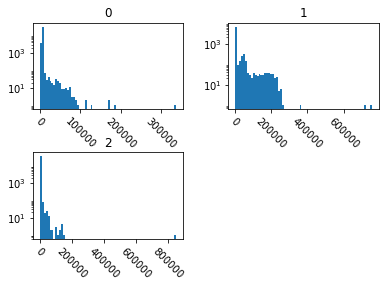

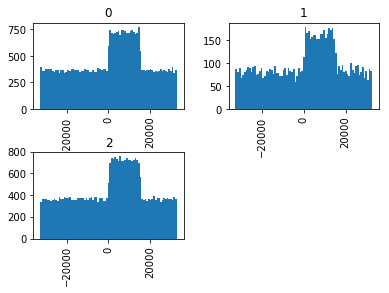

In [8]:
skewbins = [-5.,-0.05, 0.05, 5]
df['skewbin'] = pd.cut(df.TRK_SKEW, skewbins, labels=False)
df.hist('TRK_SKEW', bins=100, log=True)
df.hist('TRK_SKEW', by='skewbin', bins=30, xrot=-45., log=True)
df.hist('TRK_PHI2', grid=True, by='skewbin', bins=70)
df.hist('TRK_PI', grid=True, by='skewbin', bins=70, xrot=-45., log=True)
df.hist('eventID', by='skewbin', bins=81)